In [12]:
import pandas as pd
import os

In [13]:
# Define file prefixes in a list
file_prefixes = [
    "../English/Adhd_eng/",
    "../English/Anxiety_eng/",
    "../English/Asd_eng/",
    "../English/Bipolar_eng/",
    "../English/Control_eng/",
    "../English/Depression_eng/",
    "../English/Eating_eng/",
    "../English/Ocd_eng/",
    "../English/Ptsd_eng/",
    "../English/Schizophrenia_eng/",
    "../Spanish/Adhd_esp/",
    "../Spanish/Anxiety_esp/",
    "../Spanish/Asd_esp/",
    "../Spanish/Bipolar_esp/",
    "../Spanish/Control_esp/",
    "../Spanish/Depression_esp/",
    "../Spanish/Eating_esp/",
    "../Spanish/Ocd_esp/",
    "../Spanish/Ptsd_esp/",
    "../Spanish/Schizophrenia_esp/"
]


In [14]:
# Initialize a list to hold all DataFrames
dataframes = []

# Loop through each prefix and read CSV files
for prefix in file_prefixes:
    # Determine the language based on the prefix
    language = 'English' if 'English' in prefix else 'Spanish'
    
    # Create full paths and read CSV files into DataFrames
    full_paths = [os.path.join(prefix, file) for file in os.listdir(prefix) if file.endswith('.csv')]
    
    for file in full_paths:
        df = pd.read_csv(file)

        # This is for a bug where the classes are named differently in English and Spanish
        if (prefix == "../English/Eating_eng/"):
            df["class"] = "EATING"
        elif (prefix == "../English/Asd_eng/"):
            df["class"] = "ASD"

        df['language'] = language  # Add a new column for the language
        dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)

In [15]:
all_data

,class,tweet_id,day,time,tweet,tweet_favorite_count,tweet_retweet_count,tweet_source,user_id,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,language
0,ADHD,1552132844868325376,2022-07-27,03:24:42,"""Did my software training and 4 hours of shado...",0,0,Twitter for iPhone,610904243,248,692,9,8544,English
1,ADHD,1552006850740109314,2022-07-26,19:04:02,"""The anxiety is high because Im getting ready ...",0,0,Twitter for iPhone,610904243,248,692,9,8544,English
2,ADHD,1551980828435140608,2022-07-26,17:20:38,"""Marked as to-read: What Happened To You? by B...",0,0,Goodreads,610904243,248,692,9,8544,English
3,ADHD,1551977006203559936,2022-07-26,17:05:27,"""@USER My birthday is tomorrow so my mom got m...",0,0,Twitter for iPhone,610904243,248,692,9,8544,English
4,ADHD,1551209657355669504,2022-07-24,14:16:17,"""Marked as 2022-reads: The Boardwalk Bookshop ...",0,0,Goodreads,610904243,248,692,9,8544,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768859,SCHIZOPHRENIA,1430049251707564041,2021-08-24,06:08:05,Chinos?,0,0,Twitter for Android,981223633040412678,32,95,0,8363,Spanish
7768860,SCHIZOPHRENIA,1430041645236596759,2021-08-24,05:37:51,Vas a morir hdp :'(,0,0,Twitter for Android,981223633040412678,32,95,0,8363,Spanish
7768861,SCHIZOPHRENIA,1430040178387824654,2021-08-24,05:32:02,Está me gustahttps://youtu.be/Dr6iQxNu0wo,0,0,Twitter for Android,981223633040412678,32,95,0,8363,Spanish
7768862,SCHIZOPHRENIA,1430035184989220879,2021-08-24,05:12:11,Que falló?,0,0,Twitter for Android,981223633040412678,32,95,0,8363,Spanish


In [16]:
total = len(all_data)
class_counts = all_data["class"].value_counts()
percentages = (class_counts / total * 100).round(2)
print("\nClass distribution (percentage of total data):")
for class_name, percentage in percentages.items():
    print(f"{class_name}: {percentage}%")


Class distribution (percentage of total data):
CONTROL: 54.66%
ADHD: 14.86%
DEPRESSION: 8.71%
ANXIETY: 5.83%
ASD: 4.61%
BIPOLAR: 3.28%
PTSD: 3.14%
OCD: 2.22%
EATING: 1.82%
SCHIZOPHRENIA: 0.87%


In [17]:
import re
from concurrent.futures import ProcessPoolExecutor

In [18]:
# Define patterns
USER_PATTERN = re.compile(r'@\w+')
SPECIAL_CHARS = re.compile(r'[^a-zA-Z0-9\sáéíóúüñÁÉÍÓÚÜÑ]') # Include spanish characters
REPEAT_CHARS = re.compile(r'(\w)\1{2,}')
REPEAT_NON_WORD = re.compile(r'(\W)\1{2,}')
EXTRA_SPACES = re.compile(r'\s+')

def clean_tweet(tweet):
    try:
        # Remove URLs and user mentions
        tweet = USER_PATTERN.sub('', tweet)
        
        # Convert to lowercase
        tweet = tweet.lower()
        
        tweet = re.sub('httpurl', '', tweet)

        # Remove special characters and repeating characters
        tweet = SPECIAL_CHARS.sub('', tweet)
        tweet = REPEAT_CHARS.sub(r'\1', tweet)
        tweet = REPEAT_NON_WORD.sub(r'\1', tweet)
        
        # Split into words
        words = tweet.split()
        
        # Check if tweet is too short
        if len(words) < 3:
            return None
            
        # Join words and clean up spaces
        tweet = EXTRA_SPACES.sub(' ', ' '.join(words)).strip()
        
        return tweet if tweet else None
        
    except Exception:
        return None


In [19]:
def process_tweets(tweets, num_workers=None):
    # Use optimal number of workers
    if num_workers is None:
        num_workers = min(32, os.cpu_count() + 4)
    
    # Process in larger chunks for better performance
    chunk_size = max(1000, len(tweets) // (num_workers * 2))
    
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        cleaned_tweets = list(executor.map(clean_tweet, tweets, chunksize=chunk_size))
    
    return cleaned_tweets

In [20]:
all_data["tweet"].loc[1010:1020].tolist()

['"Yep, I have shit I either need to work through or get the fuck over before I end up a lonely old lady with 6 million cats."',
 '"@USER Yeah, it was just a smart ass question not a dig at him. Hes always afraid Im posting stuff on social media about him. Like personal stuff! Which you know I dont."',
 '"So, I asked an opinion on FB yesterday about coffee grounds and whether youd drink them or not well Ron was all Im going to ask opinions on FB and Im like I did. He threw a fit about how I worded it and said dont put our personal shit on social media. How is that personal?"',
 '"Marked as 2021-reads: New Leaf by Catherine Anderson HTTPURL"',
 '"I have some things I need to work on, but I dont know if I really need to work on them or if its just part of who I am. Nor do I know who to talk to about this because my therapist tends to gloss over it. And I dont want to journal about it because then Ill just wallow in it."',
 '"There was drama over coffee this morning and once the drama cal

In [21]:
process_tweets(all_data["tweet"].loc[1010:1020])

['yep i have shit i either need to work through or get the fuck over before i end up a lonely old lady with 6 million cats',
 'yeah it was just a smart ass question not a dig at him hes always afraid im posting stuff on social media about him like personal stuff which you know i dont',
 'so i asked an opinion on fb yesterday about coffee grounds and whether youd drink them or not well ron was all im going to ask opinions on fb and im like i did he threw a fit about how i worded it and said dont put our personal shit on social media how is that personal',
 'marked as 2021reads new leaf by catherine anderson',
 'i have some things i need to work on but i dont know if i really need to work on them or if its just part of who i am nor do i know who to talk to about this because my therapist tends to gloss over it and i dont want to journal about it because then ill just wallow in it',
 'there was drama over coffee this morning and once the drama calmed down we scrubbed all parts of the coff

In [22]:
all_data["tweet"].loc[6_001_000:6_002_000].tolist()

['@USUARIO q hablas duermete',
 '@USUARIO pues ahora te aguantas',
 '@USUARIO @USUARIO yo también quiero ayuda sí JAJAJAJAJ🥺',
 '@USUARIO si quedan',
 '@USUARIO ojalá Rubén ojalá',
 'me encanta ver que no soy la única que llama cole a la uni HTTPURL',
 '@USUARIO vale.',
 'siempre se puede HTTPURL',
 '@USUARIO @USUARIO también hablaban más que nosotros xd',
 '@USUARIO te quiero más que a tus comentarios bonitos🥺',
 '@USUARIO te quierooooooo kevin sunn💞',
 '@USUARIO no entiendo es que soy de insta🥴',
 'no sé cómo va lo de subir fotos a tw HTTPURL',
 '@USUARIO no vuelvas a cortar jamón en tu vida',
 '@USUARIO @USUARIO @USUARIO vuestro amigo lo suelta sin necesidad de copiapega de internet porque ÉL es internet',
 '@USUARIO así de gratis???',
 '@USUARIO @USUARIO @USUARIO me cohibís, fuera de aquí',
 '@USUARIO pobre bebecin',
 '@USUARIO magníficamente colosal',
 '@USUARIO gracias',
 '@USUARIO no me congeles porque la gente de dentro de millones de años me encontrarán y me descongelarán y no

In [23]:
process_tweets(all_data["tweet"].loc[6_001_000:6_002_000].tolist())

['q hablas duermete',
 'pues ahora te aguantas',
 'yo también quiero ayuda sí jajajajaj',
 None,
 'ojalá rubén ojalá',
 'me encanta ver que no soy la única que llama cole a la uni',
 None,
 'siempre se puede',
 'también hablaban más que nosotros xd',
 'te quiero más que a tus comentarios bonitos',
 'te quiero kevin sunn',
 'no entiendo es que soy de insta',
 'no sé cómo va lo de subir fotos a tw',
 'no vuelvas a cortar jamón en tu vida',
 'vuestro amigo lo suelta sin necesidad de copiapega de internet porque él es internet',
 'así de gratis',
 'me cohibís fuera de aquí',
 None,
 None,
 None,
 'no me congeles porque la gente de dentro de millones de años me encontrarán y me descongelarán y no habra servido de nada',
 'no quiero seguir avanzando en el tiempo en serio',
 'tiktoker buen futuro te depara',
 'dices eso para no sentirte mal',
 'yo no hago esas irrespetuosidades ts',
 'kevin el video me pide enfadarme contigo espero que no te importe',
 'habla del lol',
 None,
 'que tw mas agr

In [24]:
# Clean all tweets
cleaned_tweets = process_tweets(all_data['tweet'])

In [25]:
# Create new DataFrame with cleaned tweets and classes
final_data = pd.DataFrame({
    'tweet': cleaned_tweets,
    'class': all_data['class'],
    'language': all_data['language'],
    
}).dropna()

# Save to CSV
final_data.to_csv('../cleaned_tweets.csv', index=False)

In [26]:
final_data

,tweet,class,language
0,did my software training and 4 hours of shadow...,ADHD,English
1,the anxiety is high because im getting ready t...,ADHD,English
2,marked as toread what happened to you by bruce...,ADHD,English
3,my birthday is tomorrow so my mom got me birth...,ADHD,English
4,marked as 2022reads the boardwalk bookshop by ...,ADHD,English
...,...,...,...
7768857,nazi dice qué no es mejor jugar una partida qu...,SCHIZOPHRENIA,Spanish
7768858,o yo no see,SCHIZOPHRENIA,Spanish
7768860,vas a morir hdp,SCHIZOPHRENIA,Spanish
7768861,está me gustahttpsyoutubedr6iqxnu0wo,SCHIZOPHRENIA,Spanish


In [27]:
max_length = final_data["tweet"].str.len().max()
avg_length = final_data["tweet"].str.len().mean()

print(f"Max tweet length: {max_length}")
print(f"Average tweet length: {avg_length}")

Max tweet length: 498
Average tweet length: 92.25793253534628


In [28]:
percentile = final_data["tweet"].str.len().quantile(0.90)
print(f"90th percentile tweet length: {percentile}")

90th percentile tweet length: 218.0


In [30]:
import matplotlib.pyplot as plt

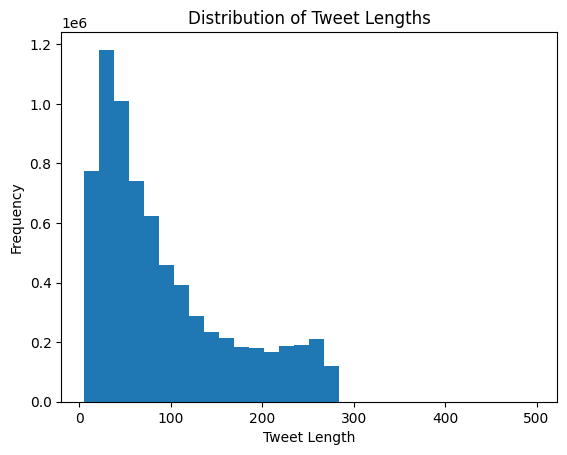

In [31]:
plt.hist(final_data["tweet"].str.len(), bins=30)
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.title("Distribution of Tweet Lengths")
plt.show()

Processed 0 texts
Processed 100000 texts
Processed 200000 texts
Processed 300000 texts
Processed 400000 texts
Processed 500000 texts
Processed 600000 texts
Processed 700000 texts
Processed 800000 texts
Processed 900000 texts
Processed 1000000 texts
Processed 1100000 texts
Processed 1200000 texts
Processed 1300000 texts
Processed 1400000 texts
Processed 1500000 texts
Processed 1600000 texts
Processed 1700000 texts
Processed 1800000 texts
Processed 1900000 texts
Processed 2000000 texts
Processed 2100000 texts
Processed 2200000 texts
Processed 2300000 texts
Processed 2400000 texts
Processed 2500000 texts
Processed 2600000 texts
Processed 2700000 texts
Processed 2800000 texts
Processed 2900000 texts
Processed 3000000 texts
Processed 3100000 texts
Processed 3200000 texts
Processed 3300000 texts
Processed 3400000 texts
Processed 3500000 texts
Processed 3600000 texts
Processed 3700000 texts
Processed 3800000 texts
Processed 3900000 texts
Processed 4000000 texts
Processed 4100000 texts
Process

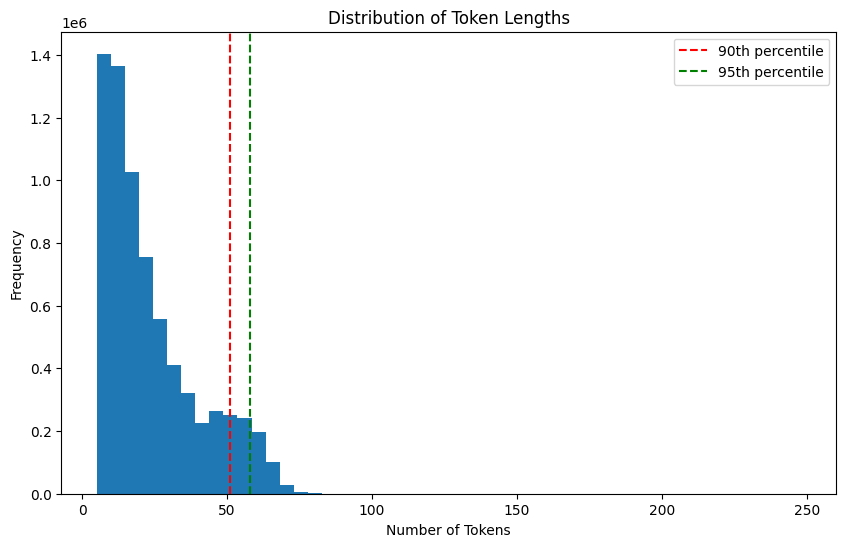

In [24]:
from transformers import XLMRobertaTokenizer
import numpy as np

# Initialize tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

# Function to get token lengths for a batch of texts
def get_token_lengths(texts, batch_size=1000):
    lengths = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size].tolist()
        encoded = tokenizer(batch, truncation=False, padding=False)
        batch_lengths = [len(seq) for seq in encoded['input_ids']]
        lengths.extend(batch_lengths)
        
        if i % 100000 == 0:
            print(f"Processed {i} texts")
    
    return lengths

# Get token lengths for all tweets
token_lengths = get_token_lengths(final_data['tweet'])

# Calculate statistics
mean_len = np.mean(token_lengths)
median_len = np.median(token_lengths)
p90_len = np.percentile(token_lengths, 90)
p95_len = np.percentile(token_lengths, 95)
p99_len = np.percentile(token_lengths, 99)
max_len = np.max(token_lengths)

print(f"\nToken length statistics:")
print(f"Mean: {mean_len:.1f}")
print(f"Median: {median_len:.1f}")
print(f"90th percentile: {p90_len:.1f}")
print(f"95th percentile: {p95_len:.1f}")
print(f"99th percentile: {p99_len:.1f}")
print(f"Max: {max_len:.1f}")

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(token_lengths, bins=50)
plt.title('Distribution of Token Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.axvline(p90_len, color='r', linestyle='--', label='90th percentile')
plt.axvline(p95_len, color='g', linestyle='--', label='95th percentile')
plt.legend()
plt.show()